In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Read purchase data
purchase = pd.read_csv("/content/drive/MyDrive/Portfolio/Quantium/purchase.csv")
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Read transaction data
transaction = pd.read_excel("/content/drive/MyDrive/Portfolio/Quantium/transaction.xlsx")
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


# Merging purchase and transaction data and cleaning it before analysis


In [ ]:
#converting DATE data type from int to datetime

base_date = pd.Timestamp('1899-12-30')
transaction['DATE'] = pd.to_timedelta(transaction['DATE'], unit='D') + base_date

In [ ]:
#merge transaction and  purchase data

merged = pd.merge(purchase, transaction, on = 'LYLTY_CARD_NBR', how = 'right')
merged.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264836 non-null  int64         
 1   LIFESTAGE         264836 non-null  object        
 2   PREMIUM_CUSTOMER  264836 non-null  object        
 3   DATE              264836 non-null  datetime64[ns]
 4   STORE_NBR         264836 non-null  int64         
 5   TXN_ID            264836 non-null  int64         
 6   PROD_NBR          264836 non-null  int64         
 7   PROD_NAME         264836 non-null  object        
 8   PROD_QTY          264836 non-null  int64         
 9   TOT_SALES         264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


In [ ]:
missing_data = merged.isnull().sum()
print(missing_data)

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64


In [ ]:
merged.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.648360e+05,264836.00000,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,1.355495e+05,135.08011,1.351583e+05,56.583157,1.907309,7.304200
std,8.057998e+04,76.78418,7.813303e+04,32.826638,0.643654,3.083226
min,1.000000e+03,1.00000,1.000000e+00,1.000000,1.000000,1.500000
25%,7.002100e+04,70.00000,6.760150e+04,28.000000,2.000000,5.400000
50%,1.303575e+05,130.00000,1.351375e+05,56.000000,2.000000,7.400000
75%,2.030942e+05,203.00000,2.027012e+05,85.000000,2.000000,9.200000
max,2.373711e+06,272.00000,2.415841e+06,114.000000,200.000000,650.000000


It is clear from the statistics of the data that there are high chances that Product quantity has outliers. Because the maximum value of 200 is significantly higher than the mean and the 75% percentile value of 2.

Similarly, for the total sales column, The maximum value of 650 is also significantly higher than the mean and the 75% percentile. This could be due to outlier transactions with very high sales amounts, possibly related to the outlier in product quantity.

In [ ]:
#checking for outliers

Q1 = merged['PROD_QTY'].quantile(0.25)
Q3 = merged['PROD_QTY'].quantile(0.75)
IQR = Q3 - Q1

# Values outside this range could be considered outliers
outlier_condition = ((merged['PROD_QTY'] < (Q1 - 1.5 * IQR)) | (merged['PROD_QTY'] > (Q3 + 1.5 * IQR)))
outliers = merged[outlier_condition]
print(outliers)


        LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER       DATE  \
1                 1307  MIDAGE SINGLES/COUPLES           Budget 2019-05-14   
3                 2373  MIDAGE SINGLES/COUPLES           Budget 2018-08-17   
4                 2426  MIDAGE SINGLES/COUPLES           Budget 2018-08-18   
5                 4074  MIDAGE SINGLES/COUPLES           Budget 2019-05-19   
6                 4149  MIDAGE SINGLES/COUPLES           Budget 2019-05-16   
...                ...                     ...              ...        ...   
264754          268396   YOUNG SINGLES/COUPLES          Premium 2018-10-07   
264755          268463   YOUNG SINGLES/COUPLES          Premium 2018-10-22   
264756          268491   YOUNG SINGLES/COUPLES          Premium 2019-04-28   
264824          272193   YOUNG SINGLES/COUPLES          Premium 2019-03-13   
264832          272358   YOUNG SINGLES/COUPLES          Premium 2018-08-13   

        STORE_NBR  TXN_ID  PROD_NBR                            

In [ ]:
# This will print the entire row(s) with the highest PROD_QTY value
print(merged[merged['PROD_QTY'] == merged['PROD_QTY'].max()])


       LYLTY_CARD_NBR       LIFESTAGE PREMIUM_CUSTOMER       DATE  STORE_NBR  \
69762          226000  OLDER FAMILIES          Premium 2018-08-19        226   
69763          226000  OLDER FAMILIES          Premium 2019-05-20        226   

       TXN_ID  PROD_NBR                         PROD_NAME  PROD_QTY  TOT_SALES  
69762  226201         4  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  226210         4  Dorito Corn Chp     Supreme 380g       200      650.0  


In [ ]:
#finding details of the customer
# Filter for all transactions of the customer with loyalty card number 226000

customer_transactions = merged[merged['LYLTY_CARD_NBR'] == 226000]

# Display the transactions
print(customer_transactions)


       LYLTY_CARD_NBR       LIFESTAGE PREMIUM_CUSTOMER       DATE  STORE_NBR  \
69762          226000  OLDER FAMILIES          Premium 2018-08-19        226   
69763          226000  OLDER FAMILIES          Premium 2019-05-20        226   

       TXN_ID  PROD_NBR                         PROD_NAME  PROD_QTY  TOT_SALES  
69762  226201         4  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  226210         4  Dorito Corn Chp     Supreme 380g       200      650.0  


From the above details, it seems like the customer has placed the order for the commercial purpose and not retail. we can remove this customer from our records.

In [ ]:
merged_cleaned = merged[merged['LYLTY_CARD_NBR'] != 226000]

In [ ]:
merged_cleaned.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000


In [ ]:
merged_cleaned['DATE'].describe()

<ipython-input-18-fc432d8ae50c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_cleaned['DATE'].describe()


count                  264834
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

The observation that there are 364 unique dates in a year (which should usually have 365 days or 366 in a leap year) suggests there might be a day with no recorded transactions. This could be significant, especially in retail data analysis, for a few reasons:

Business Operations: It could indicate a day when the store was closed (e.g., Christmas Day or New Year's Day), which is useful to know for time series analysis.

Data Quality: It might highlight a potential issue with data collection or entry, suggesting that the data for one day may be missing or wasn't recorded.

Sales Analysis: Knowing there's a day without transactions can be important for calculating daily sales averages or comparing sales trends across different days or weeks.


In [ ]:
#checking the date that is missing

date_range = pd.date_range(start='2018-07-01', end='2019-06-30').difference(merged_cleaned['DATE'])
print(f"The missing date(s): {date_range}")

The missing date(s): DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)


As the date is 25th december, i.e christmas, it is obvious that the store must be closed due to holiday. Therefore, we are clear that there is actually no missing date in the dataset.


# **Extracting pack size**

In [ ]:
merged_cleaned['PACK_SIZE'] = merged_cleaned['PROD_NAME'].str.extract('(\d+)g').astype(float)

<ipython-input-20-ea04d80d05c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_cleaned['PACK_SIZE'] = merged_cleaned['PROD_NAME'].str.extract('(\d+)g').astype(float)


# Extracting Brand name


In [ ]:
merged_cleaned['BRAND_NAME'] = merged_cleaned['PROD_NAME'].str.split().str[0]

<ipython-input-21-a338f5d6b16f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_cleaned['BRAND_NAME'] = merged_cleaned['PROD_NAME'].str.split().str[0]


# Metrics of interest


**Total Spend by Customer Segment:**

In [ ]:
total_spend = merged_cleaned.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
print(total_spend)

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   35514.80
1   MIDAGE SINGLES/COUPLES       Mainstream   90803.85
2   MIDAGE SINGLES/COUPLES          Premium   58432.65
3             NEW FAMILIES           Budget   21928.45
4             NEW FAMILIES       Mainstream   17013.90
5             NEW FAMILIES          Premium   11491.10
6           OLDER FAMILIES           Budget  168363.25
7           OLDER FAMILIES       Mainstream  103445.55
8           OLDER FAMILIES          Premium   80658.40
9    OLDER SINGLES/COUPLES           Budget  136769.80
10   OLDER SINGLES/COUPLES       Mainstream  133393.80
11   OLDER SINGLES/COUPLES          Premium  132263.15
12                RETIREES           Budget  113147.80
13                RETIREES       Mainstream  155677.05
14                RETIREES          Premium   97646.05
15          YOUNG FAMILIES           Budget  139345.85
16          YOUNG FAMILIES       Mainstream   92788.75
17        

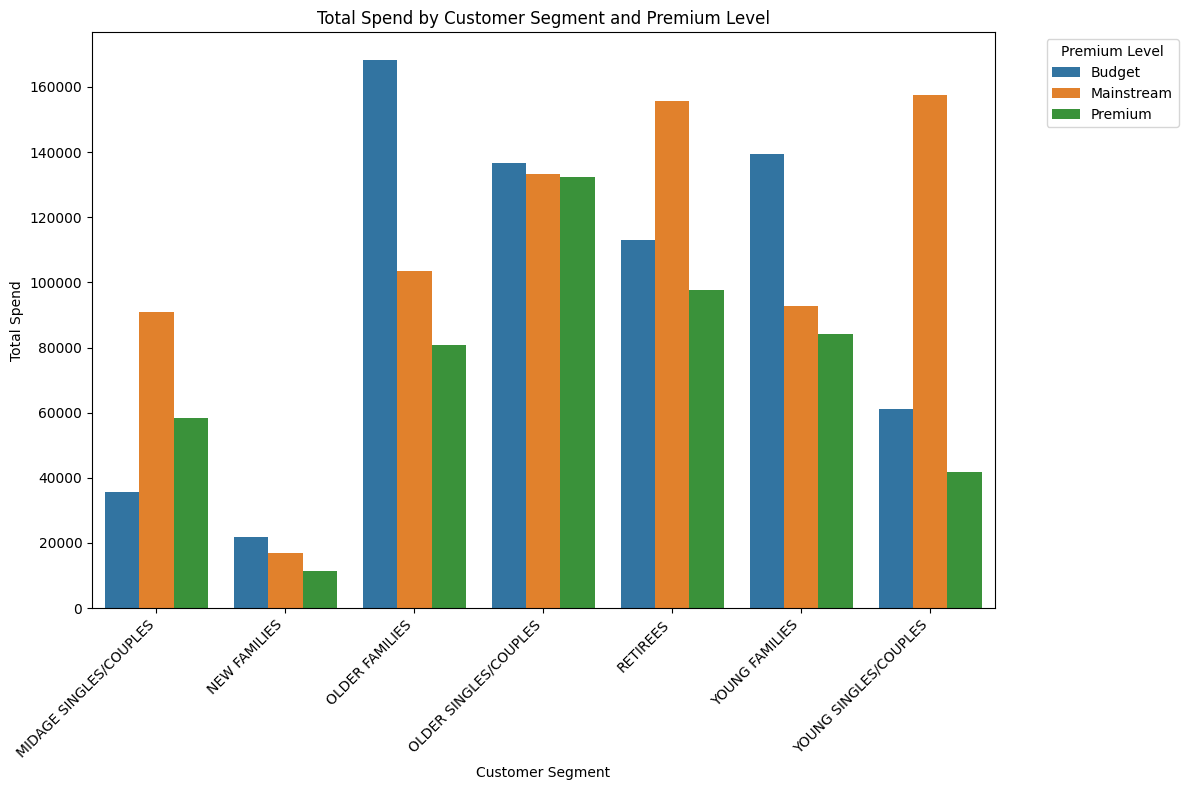

In [ ]:
#plotting the total sales by customer segments

plt.figure(figsize=(12, 8))
sns.barplot(data=total_spend, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')

plt.title('Total Spend by Customer Segment and Premium Level')
plt.xticks(rotation=45, ha="right")  # Rotate x labels for better readability
plt.xlabel('Customer Segment')
plt.ylabel('Total Spend')
plt.legend(title='Premium Level', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()  # Display the plot


**Insights:**
Mainstream Young Singles/Couples and Mainstream Retirees are prime targets for marketing campaigns due to their high contribution to sales.
Family-oriented segments (particularly Older Families - Budget) are key demographics, likely due to larger household sizes and hence, larger purchases.
New Families represent a lower spend category, possibly due to smaller family sizes or different purchasing priorities. There might be opportunities to increase their engagement with promotions or targeted marketing.
The difference in spending between premium levels within the same life stage suggests that mainstream customers tend to spend more on chips than their budget or premium counterparts.

In [ ]:
merged_cleaned['PROD_NAME'].describe()

count                                     264834
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [ ]:
merged_cleaned["PROD_NAME"].str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28860
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
Name: PROD_NAME, dtype: int64

Some product names are written in more than one way. Example : Dorito and Doritos, Grains and GrnWves, Infusions and Ifzns, Natural and NCC, Red and RRD, Smith and Smiths and Snbts and Sunbites.



In [ ]:
brand_corrections = {
    'Dorito': 'Doritos',
    'Grain': 'Grainwaves',  # Assuming 'Grains' should also be 'Grainwaves'
    'Grnwves': 'Grainwaves',
    'Infuzions': 'Infuzions',
    'Infzns': 'Infuzions',
    'NCC': 'Natural Chip Company',  # Assuming 'NCC' stands for 'Natural Chip Company'
    'Natural': 'Natural Chip Company',
    'Old': 'Old El Paso',  # Assuming 'Old' stands for 'Old El Paso'
    'Red': 'Red Rock Deli',
    'RRD': 'Red Rock Deli',
    'Smith': 'Smiths',
    'Smiths': 'Smiths',
    'Snbts': 'Sunbites',
    'Sunbites': 'Sunbites',
    # ... add other corrections as necessary
}

In [ ]:
def correct_brand_names(name):
    for incorrect, correct in brand_corrections.items():
        if name.startswith(incorrect):
            return correct
    return name

# Apply the corrections to the PROD_NAME column
merged_cleaned['BRAND_NAME'] = merged_cleaned['PROD_NAME'].str.split().str[0].apply(correct_brand_names)

# Check the cleaned brand names
print(merged_cleaned['BRAND_NAME'].value_counts())

Kettle                  41288
Smiths                  31823
Doritos                 28145
Pringles                25102
Red Rock Deli           17779
Infuzions               14201
Thins                   14075
WW                      10320
Cobs                     9693
Tostitos                 9471
Twisties                 9454
Old El Paso              9324
Natural Chip Company     7469
Tyrrells                 6442
Grainwaves               6272
Cheezels                 4603
CCs                      4551
Woolworths               4437
Sunbites                 3008
Cheetos                  2927
Burger                   1564
GrnWves                  1468
French                   1418
Name: BRAND_NAME, dtype: int64


<ipython-input-27-4d9e6e0791c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_cleaned['BRAND_NAME'] = merged_cleaned['PROD_NAME'].str.split().str[0].apply(correct_brand_names)


In [ ]:
merged_cleaned['PACK_SIZE'].unique()

array([175., 170., 150., 300., 330., 210.,  nan, 270., 220., 125., 110.,
       134., 380., 180., 165., 135., 250., 200., 160., 190.,  90.,  70.])

In [ ]:
# Calculate the total quantity purchased for each pack size
pack_size_purchases = merged_cleaned.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()

# Sort the results to find the most purchased pack size
pack_size_purchases_sorted = pack_size_purchases.sort_values('PROD_QTY', ascending=False)

# Display the pack size that is most purchased
print(pack_size_purchases_sorted.head(1))  # This shows the top result


    PACK_SIZE  PROD_QTY
10      175.0    123692


In [ ]:
most_purchased_pack_size = 175  # You would dynamically get this from previous steps

# Filter the DataFrame for rows with this pack size
most_purchased_products = merged_cleaned[merged_cleaned['PACK_SIZE'] == most_purchased_pack_size]

# Get a count of product names to see which are the most common for this pack size
category_counts = most_purchased_products['PROD_NAME'].value_counts()

# Display the chip categories associated with this pack size
print(category_counts)


Kettle Mozzarella   Basil & Pesto 175g     3304
Tostitos Splash Of  Lime 175g              3252
Thins Potato Chips  Hot & Spicy 175g       3229
Kettle Sweet Chilli And Sour Cream 175g    3200
Thins Chips Light&  Tangy 175g             3188
Kettle Sea Salt     And Vinegar 175g       3173
Kettle Original 175g                       3159
Kettle Honey Soy    Chicken 175g           3148
Tostitos Smoked     Chipotle 175g          3145
Thins Chips Seasonedchicken 175g           3114
Thins Chips Salt &  Vinegar 175g           3103
Tostitos Lightly    Salted 175g            3074
Kettle Chilli 175g                         3038
Smiths Chip Thinly  Cut Original 175g      1614
Natural Chip Co     Tmato Hrb&Spce 175g    1572
Natural ChipCo Sea  Salt & Vinegr 175g     1550
CCs Tasty Cheese    175g                   1539
Smiths Thinly Cut   Roast Chicken 175g     1519
CCs Original 175g                          1514
CCs Nacho Cheese    175g                   1498
Smiths Chip Thinly  S/Cream&Onion 175g  

In [ ]:
brand_sales = merged_cleaned.groupby('BRAND_NAME')['TOT_SALES'].sum().reset_index()


In [ ]:
# Sort the results to see the brands with the highest sales
sorted_brand_sales = brand_sales.sort_values('TOT_SALES', ascending=False)


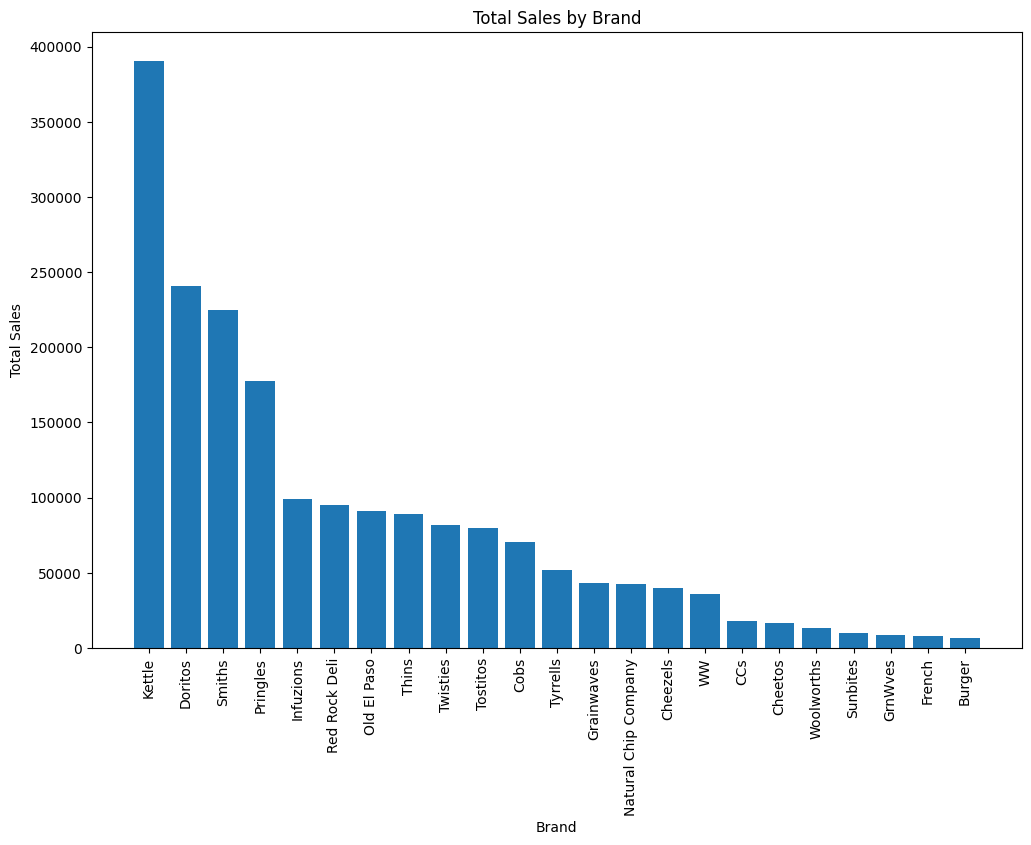

# Final insights from chip sales analysis

1. Sales by Customer Segment:
The Mainstream Young Singles/Couples segment had the highest total spend on chips, amounting to $157,621.60, indicating their significant contribution to the chip category.

Mainstream Retirees followed closely with a total spend of $155,677.05.

2. Pack Size Preferences: The most purchased pack size was 175g, accounting for 123692 product quantity purchase, suggesting a strong customer preference for this size.

3. Brand Performance:
The brand Kettle led the sales with a total of 400k, highlighting its popularity among customers.
In contrast, brand doritos, while having multiple product variations, still managed a substaintial total sales figure of $25k.

4. Price Sensitivity: Our analysis showed that customers in the Mainstream segment, particularly young singles/couples, are less price-sensitive.

5. Product Affinity: Certain brands, such as Tyrrells and Twisties, showed a strong affinity within specific customer segments, with sales figures.

Conclusions and Recommendations:
Focusing marketing and promotional activities on the Mainstream Young Singles/Couples segment could further drive sales, as this group has demonstrated both high spending and less price sensitivity.
Considering pack size preferences, stocking more 175g packs across all stores could meet customer demand more effectively.
Encouraging brand switching for customers purchasing lower-sales brands to more popular brands such as Kettle could improve overall profitability.


